### Some Geopandas Examples
https://gadm.org/download_country_v3.html<br>
http://geopandas.org/index.html

### Import libraries

In [1]:
# The basic libraries required for this to work
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

### Working with shapefiles
Shapefiles are marvellous things that contain information on how to draw the very strange polygon shapes that make up the countries, states, provinces, districts, etc. of the countries of the world. The best resource I've found to obtain this data is https://gadm.org/download_country_v3.html<br>
The shapefiles usually come zipped and contain a *.shp* file as well as *.cpg, .dbf, .prj, .shx* files. Copy all of them to your working folder before you start.

In [2]:
# To import, we'll reference the .shp file for South Africa, using GeoPandas read_file method
za = gpd.read_file("gadm36_ZAF_1.shp")

In [3]:
# This is what the imported data looks like - note that the column containing the shape data 
# will always be named geometry - it will contain points, lines or polygons
za.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,ZAF,South Africa,ZAF.1_1,Eastern Cape,Oos-Kaap,None,Provinsie,Province,EC,ZA.EC,"(POLYGON ((26.28513908 -33.83736038, 26.285139..."
1,ZAF,South Africa,ZAF.2_1,Free State,Orange Free State|Vrystaat,None,Provinsie,Province,FS,ZA.FS,"POLYGON ((25.5507431 -30.61563683, 25.55064011..."
2,ZAF,South Africa,ZAF.3_1,Gauteng,Pretoria/Witwatersrand/Vaal,None,Provinsie,Province,GT,ZA.GT,"POLYGON ((28.40010071 -26.65504456, 28.3979892..."
3,ZAF,South Africa,ZAF.4_1,KwaZulu-Natal,Natal and Zululand,None,Provinsie,Province,KZN,ZA.NL,"(POLYGON ((32.08625031 -28.79458427, 32.086250..."
4,ZAF,South Africa,ZAF.5_1,Limpopo,Noordelike Provinsie|Northern Transvaal|Northe...,None,Provinsie,Province,LIM,ZA.NP,"POLYGON ((27.2235508 -25.0674057, 27.2236557 -..."


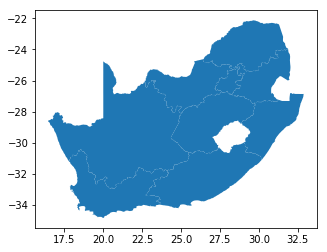

In [111]:
# Drawing a plot of the imported data is simple!
za.plot()

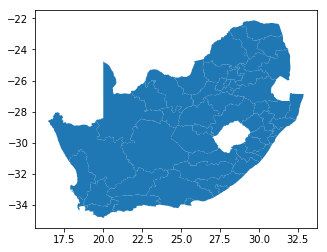

In [112]:
# Import the shapefile most appropriate for the required level of detail
za_more = gpd.read_file("gadm36_ZAF_2.shp")
za_more.plot()

### Visualizing your own data

In [6]:
# Let's get some simple data to plot
za["Number"] = [3, 2, 4, 1, 2, 3, 1, 2, 1]

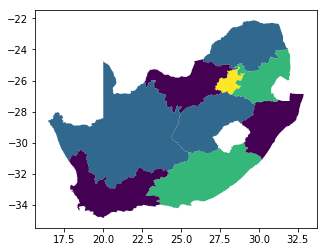

In [113]:
# Now we can plot our provinces based on this data
za.plot(column = "Number")

### Co-ordinates vs Points

In [114]:
# Now let's construct a datafram which will hold our provincial capitals with latitude and longitude
city = ["Cape Town", "Pretoria", "Bhisho", "Bloemfontein", 
"Pietermaritzburg", "Polokwane", "Mbombela", "Upington", 
"Mahikeng"]
longitude = [18.4240553, 28.2292712, 27.4409557, 26.1595761, 30.3794118, 29.4486263, 30.9694163, 21.2368084,25.64031]
latitude = [-33.9248685, -25.7478676, -32.849876, -29.085214, -29.6006068, -23.8961708, -25.4752984, -28.3952677, -25.855978]
caps = pd.DataFrame({"City":city, "Longitude":longitude, "Latitude":latitude})

In [99]:
# Note that this is a regular Pandas dataframe, not a GeoPandas dataframe (there is  no geometry data)
caps.head()

,City,Latitude,Longitude
0,Cape Town,-33.924869,18.424055
1,Pretoria,-25.747868,28.229271
2,Bhisho,-32.849876,27.440956
3,Bloemfontein,-29.085214,26.159576
4,Pietermaritzburg,-29.600607,30.379412


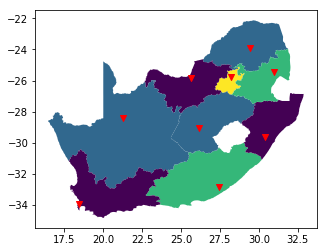

In [100]:
# But we can still use it to plot our capital cities onto our chart
za.plot(column = "Number")
plt.scatter(caps["Longitude"], caps["Latitude"], marker = "v", c = "red")

In [101]:
# There may be times when we want to convert these co-ordinates to points, however, 
# so that we can work with them more easily in the GeoPandas environment
# The following post exlains how - awesome: 
# https://gis.stackexchange.com/questions/174159/convert-a-pandas-dataframe-to-a-geodataframe
# This is where the shapely library comes in handy

geometry = [Point(xy) for xy in zip(caps["Longitude"], caps["Latitude"])]
crs = {'init': 'epsg:4326'}
caps_points = GeoDataFrame(caps["City"], crs=crs, geometry=geometry)

# The refinements of crs (Coordinate Reference Systems) are quite well-described in the documentation
# http://geopandas.org/projections.html

# Instead of latitude and longitude we now have points:
caps_points.head()

,City,geometry
0,Cape Town,POINT (18.4240553 -33.9248685)
1,Pretoria,POINT (28.2292712 -25.7478676)
2,Bhisho,POINT (27.4409557 -32.849876)
3,Bloemfontein,POINT (26.1595761 -29.085214)
4,Pietermaritzburg,POINT (30.3794118 -29.6006068)


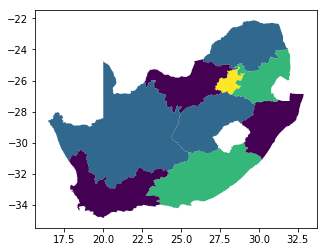

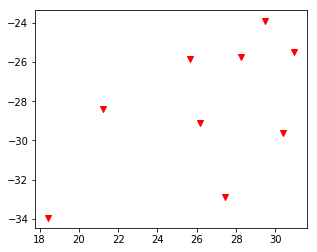

In [115]:
# Note how THIS code is going to give us a funny result with provinces and capitals on separate plots
# plt.show() doesn't help btw!
za.plot(column = "Number")
caps_points.plot(marker = "v", c = "red")

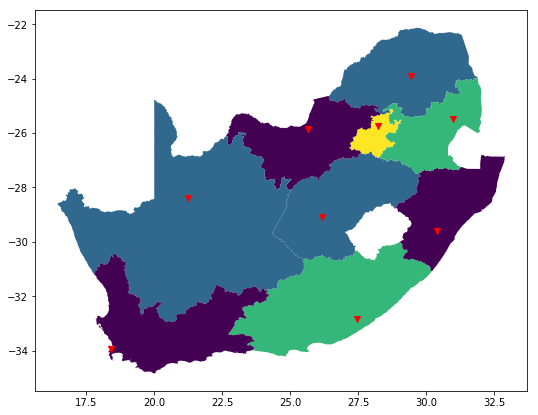

In [116]:
# This is how we'll get them back onto the same chart AND make it a bit bigger for readability
ax = za.plot(column = "Number", figsize = (10, 7))
caps_points.plot(ax = ax, marker = "v", c = "red", )
plt.show()

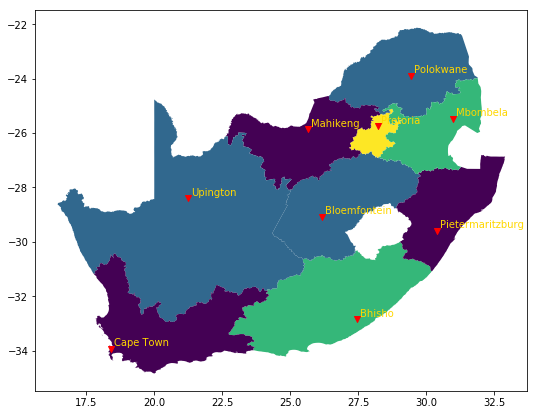

In [134]:
# It would also be handy to label these cities|
ax = za.plot(column = "Number", figsize = (10, 7))
caps_points.plot(ax = ax, marker = "v", c = "red", )
for x, y, label in zip(caps_points.geometry.x, caps_points.geometry.y, caps_points.City):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", color = "gold")
plt.savefig("my_map.png")
plt.show()

### Something fancier - overlays
See documentation at http://geopandas.org/set_operations.html#the-different-overlay-operations. Here I have essentially used my own data to reconstruct the "Overlay countries example" described.

In [124]:
# Project to crs that uses meters as distance measure
za_o = za.to_crs('+init=epsg:3395')
caps_o = caps_points.to_crs('+init=epsg:3395')

In [125]:
caps_o.head(3)

,City,geometry
0,Cape Town,POINT (2050956.454343113 -3994871.775408833)
1,Pretoria,POINT (3142468.095449223 -2949330.442751956)
2,Bhisho,POINT (3054713.215404778 -3852218.285540901)


In [126]:
# Then create a buffer zone around each point - notice how the points become polygons
caps_o['geometry']= caps_o.buffer(90000)

In [127]:
caps_o.head(3)

,City,geometry
0,Cape Town,POLYGON ((2140956.454343113 -3994871.775408833...
1,Pretoria,POLYGON ((3232468.095449223 -2949330.442751956...
2,Bhisho,POLYGON ((3144713.215404778 -3852218.285540901...


In [128]:
# Now let's create the 4 different overlay types available so we can compare the results
# Note, each one of these is rather long-running which seems to be expected as per
# https://gis.stackexchange.com/questions/269055/geopandas-overlay-query-is-very-slow

In [37]:
country_cores_union = gpd.overlay(za_o, caps_o, how='union')

In [38]:
country_cores_diff = gpd.overlay(za_o, caps_o, how='difference')

In [41]:
country_cores_int = gpd.overlay(za_o, caps_o, how='intersection')

In [42]:
country_cores_symm = gpd.overlay(za_o, caps_o, how='symmetric_difference')

In [ ]:
# Now let's check the results for each one

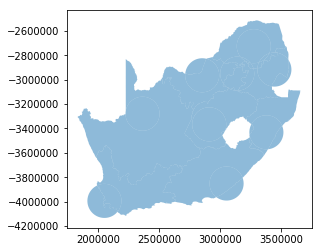

In [43]:
country_cores_union.plot(alpha=0.5)

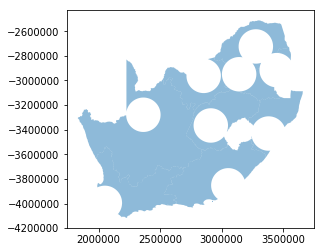

In [44]:
country_cores_diff.plot(alpha=0.5)

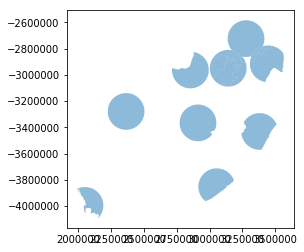

In [45]:
country_cores_int.plot(alpha=0.5)

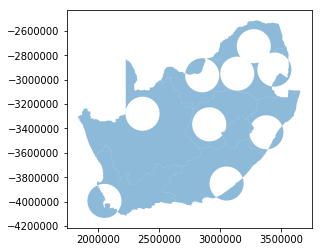

In [46]:
country_cores_symm.plot(alpha=0.5)

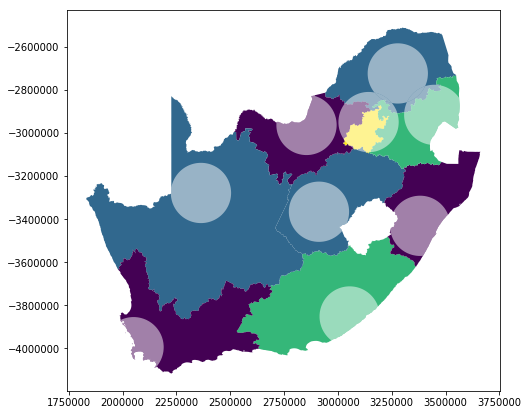

In [129]:
# As you can see, individually these may be pretty bizarre and not useful on their own
# But if you overlay them on top of your original map they can become quite meaninful
ax = za_o.plot(column = "Number", figsize = (10, 7))
country_cores_int.plot(ax = ax, color = "white", alpha=0.5, figsize = (10, 7))